In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
base_dir = "/home/dermot.kelly/Dermot_analysis/Phd/Paper_2/rumen_microbiome_pipeline/exported"

# Load feature counts
feature_df = pd.read_csv(f"{base_dir}/feature-table.tsv", sep = '\t', skiprows=1, index_col=0)

# Load taxonomy annotations
taxonomy_df = pd.read_csv(f"{base_dir}/taxonomy.tsv", sep="\t", index_col=0)

feature_df.head(), taxonomy_df.head()

(                                  GoatKid01
 #OTU ID                                    
 bba114fa8ecf1399d60ae2868ce371d4       13.0
 d70918bdb1f2adac6b0b2e0d77a17ecf       11.0
 d605feb5d07be7e145e2e87d7f7710ea      103.0
 03bb052674474c66386e7e1c33a0d3af      134.0
 36cb66b957f4b86846bf3182e0c1dae2       32.0,
                                                                               Taxon  \
 Feature ID                                                                            
 bba114fa8ecf1399d60ae2868ce371d4  d__Bacteria; p__Firmicutes; c__Negativicutes; ...   
 d70918bdb1f2adac6b0b2e0d77a17ecf  d__Bacteria; p__Firmicutes; c__Negativicutes; ...   
 d605feb5d07be7e145e2e87d7f7710ea  d__Bacteria; p__Synergistota; c__Synergistia; ...   
 03bb052674474c66386e7e1c33a0d3af  d__Bacteria; p__Firmicutes; c__Negativicutes; ...   
 36cb66b957f4b86846bf3182e0c1dae2  d__Bacteria; p__Firmicutes; c__Negativicutes; ...   
 
                                   Confidence  
 Feature ID       

In [13]:
taxonomy_df[['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']] = (
    taxonomy_df['Taxon'].str.split('; ', expand=True)
    .replace({r'^[a-z]__': ''}, regex=True)  # remove prefixes
)

taxonomy_df.head()

,Taxon,Confidence,Domain,Phylum,Class,Order,Family,Genus,Species
Feature ID,,,,,,,,,
bba114fa8ecf1399d60ae2868ce371d4,d__Bacteria; p__Firmicutes; c__Negativicutes; ...,0.955994,Bacteria,Firmicutes,Negativicutes,Veillonellales-Selenomonadales,Veillonellaceae,Megasphaera,Megasphaera_stantonii
d70918bdb1f2adac6b0b2e0d77a17ecf,d__Bacteria; p__Firmicutes; c__Negativicutes; ...,0.999991,Bacteria,Firmicutes,Negativicutes,Veillonellales-Selenomonadales,Veillonellaceae,Veillonella,None
d605feb5d07be7e145e2e87d7f7710ea,d__Bacteria; p__Synergistota; c__Synergistia; ...,0.989035,Bacteria,Synergistota,Synergistia,Synergistales,Synergistaceae,Pyramidobacter,None
03bb052674474c66386e7e1c33a0d3af,d__Bacteria; p__Firmicutes; c__Negativicutes; ...,0.985674,Bacteria,Firmicutes,Negativicutes,Veillonellales-Selenomonadales,Veillonellaceae,Megasphaera,Megasphaera_hexanoica
36cb66b957f4b86846bf3182e0c1dae2,d__Bacteria; p__Firmicutes; c__Negativicutes; ...,0.998972,Bacteria,Firmicutes,Negativicutes,Veillonellales-Selenomonadales,Veillonellaceae,Megasphaera,Megasphaera_hexanoica


In [18]:
taxonomy_df['Genus'] = taxonomy_df['Genus'].fillna('Unclassified')

In [22]:
taxonomy_df['Genus'].describe()
taxonomy_df["Genus"].isna().sum()

np.int64(0)

In [28]:
feature_with_genus = feature_df.join(taxonomy_df["Genus"])

genus_abundance = feature_with_genus.groupby("Genus").sum().T

In [30]:
genus_rel_abundance = genus_abundance.div(genus_abundance.sum(axis=1), axis=0)

# Convert to percentages and round to 2 dp
genus_rel_abundance = genus_rel_abundance * 100
genus_rel_abundance = genus_rel_abundance.round(2)
genus_rel_abundance.head()

Genus,Acidaminococcus,Acinetobacter,Actinomyces,Alistipes,Allisonella,Anaerovibrio,Bacillus,Bacteroides,Bifidobacterium,Butyricimonas,...,Streptococcus,Syntrophococcus,Treponema,Turicibacter,Unclassified,Veillonella,Weissella,[Eubacterium]_coprostanoligenes_group,[Ruminococcus]_gauvreauii_group,uncultured
GoatKid01,0.44,0.01,0.06,0.01,0.02,0.03,0.04,0.3,0.19,0.01,...,0.03,0.28,0.01,0.01,11.21,0.04,0.03,0.07,0.13,0.05


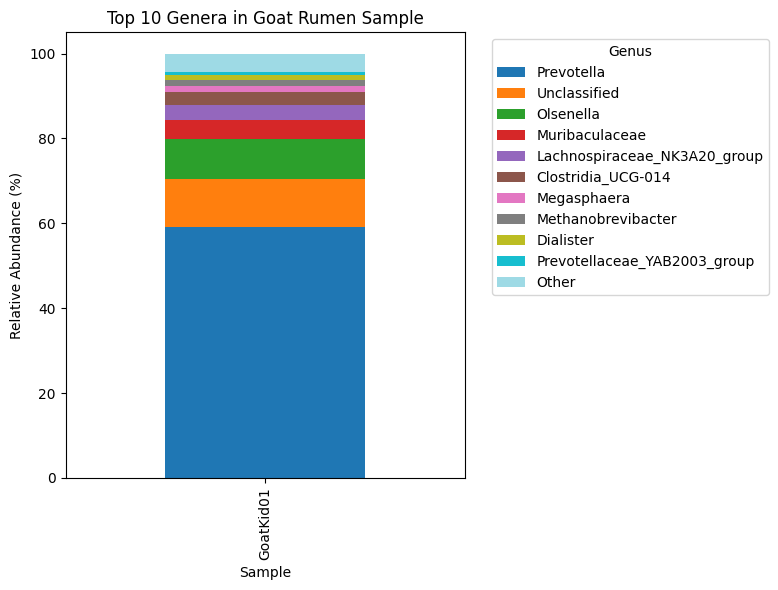

In [33]:
# Get top 10 genera by abundance (mean is redundant if only have one sample)
top_n = 10
top_genera = genus_rel_abundance.mean().sort_values(ascending=False).head(top_n).index

# Subset top genera and add "Other"
plot_df = genus_rel_abundance[top_genera].copy()
plot_df["Other"] = 100 - plot_df.sum(axis=1)

# Plot
plot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')
plt.ylabel('Relative Abundance (%)')
plt.xlabel('Sample')
plt.title(f'Top {top_n} Genera in Goat Rumen Sample')
plt.legend(title='Genus', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()